In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [127]:
df=pd.read_csv("/Users/mac/Desktop/Telco-Customer-Churn/Telco-Customer-Churn.csv")

In [128]:
#check for null values 
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [130]:
import re

def clean_numeric_string(value):
    # Remove any characters that are not digits, dots, or minus signs
    if isinstance(value, str):
        return re.sub(r'[^\d.-]', '', value)
    return value

In [131]:
df['TotalCharges'] = df['TotalCharges'].apply(clean_numeric_string)

In [132]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [133]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [135]:
# Handle missing values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [136]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [10]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

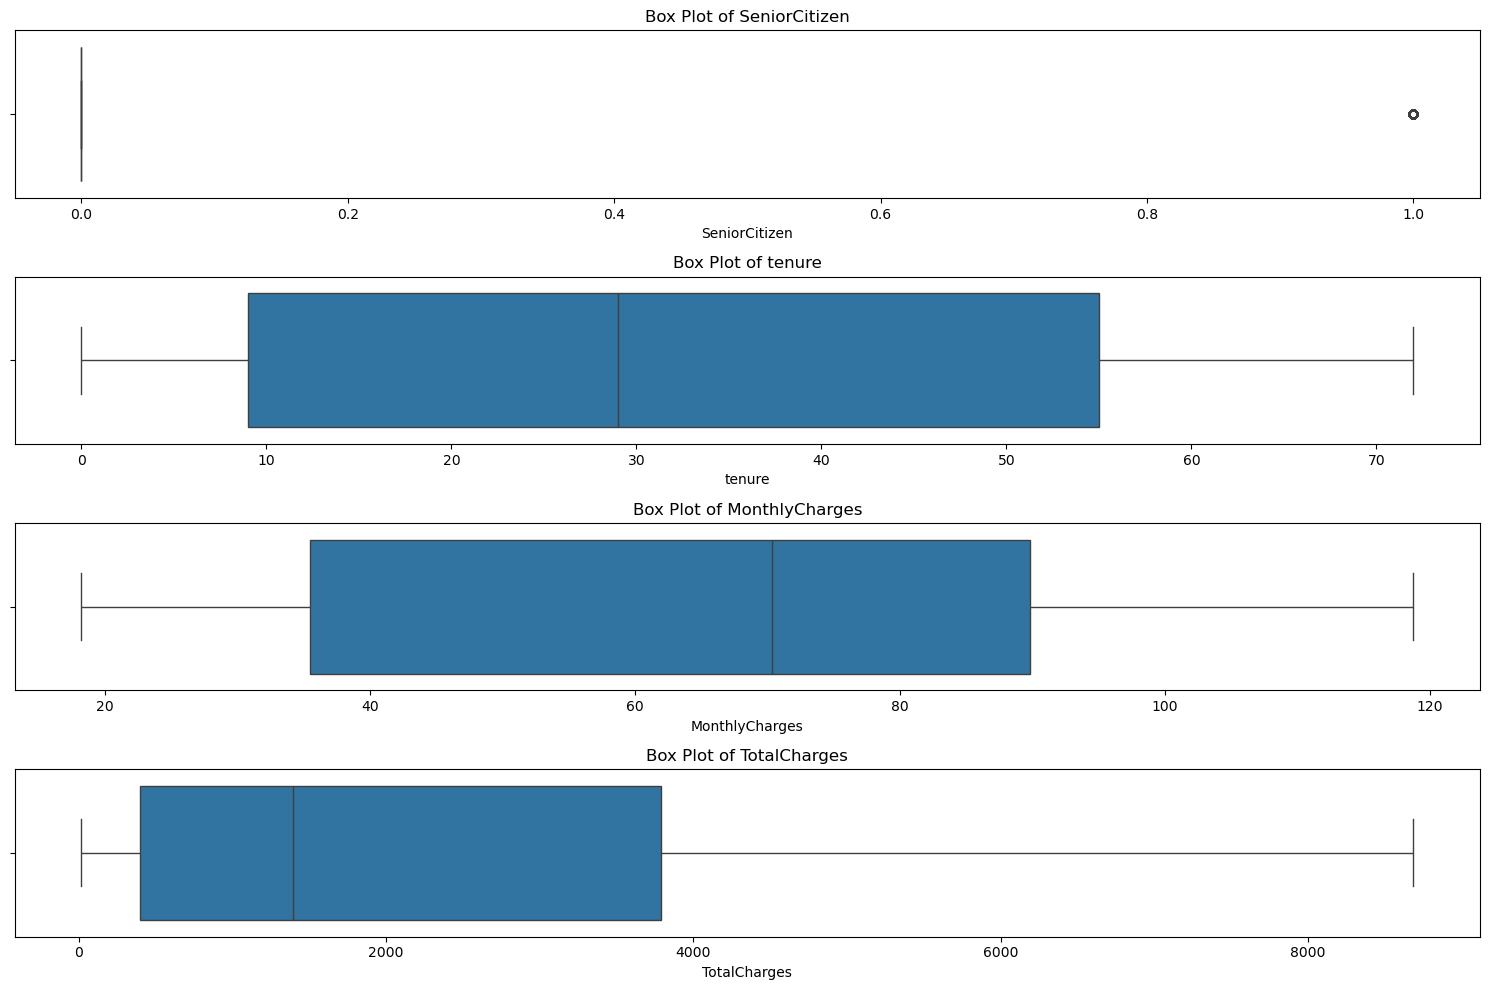

In [138]:
#check for outliers 
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for all numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


/var/folders/gk/537qy50d4ls5vppc09_8xb0r0000gn/T/ipykernel_6944/1651511101.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMethod', data=df, palette='viridis')


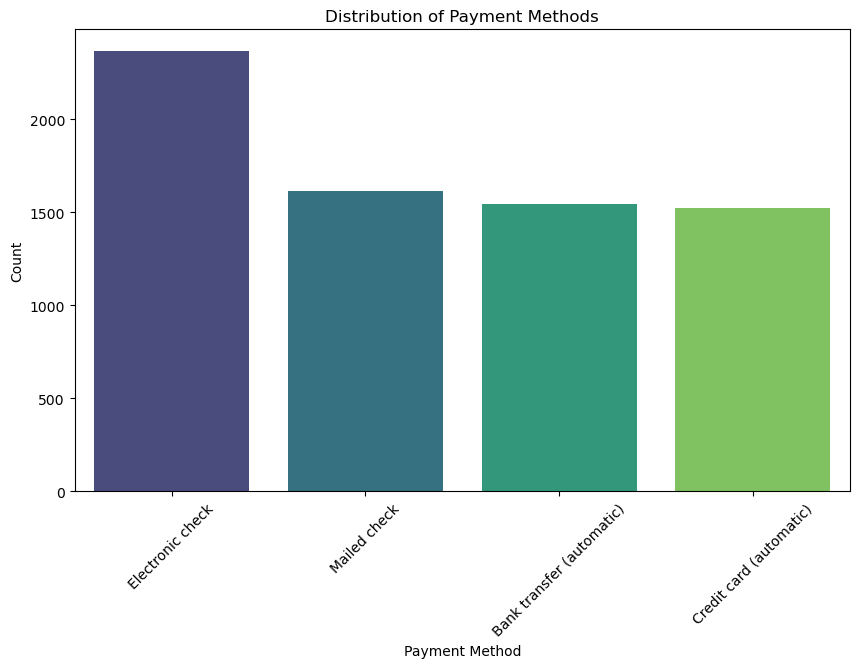

In [139]:
#let's check how our customers make thier payments 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of each payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', data=df, palette='viridis')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


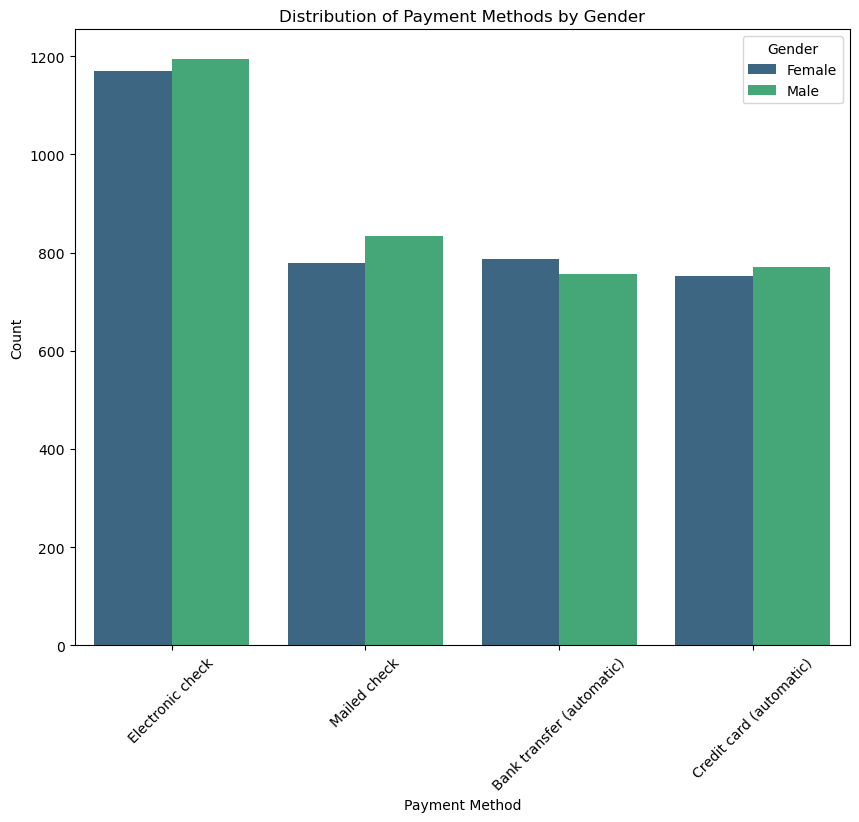

In [30]:

# Plot count of each payment method by gender
plt.figure(figsize=(10, 8))
sns.countplot(x='PaymentMethod', hue='gender', data=df, palette='viridis')
plt.title('Distribution of Payment Methods by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.legend(title='Gender')
plt.show()


/var/folders/gk/537qy50d4ls5vppc09_8xb0r0000gn/T/ipykernel_6944/4219775981.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/gk/537qy50d4ls5vppc09_8xb0r0000gn/T/ipykernel_6944/4219775981.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/gk/537qy50d4ls5vppc09_8xb0r0000gn/T/ipykernel_6944/4219775981.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/gk/537qy50d4ls5vppc09_8xb0r0000gn/T/ipykernel_6944/4219775981.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/gk/537qy50d4ls5vppc09_8xb0r0000gn/T/ipykernel_6944/4219775981.py:13: UserWarning: FixedFormatte

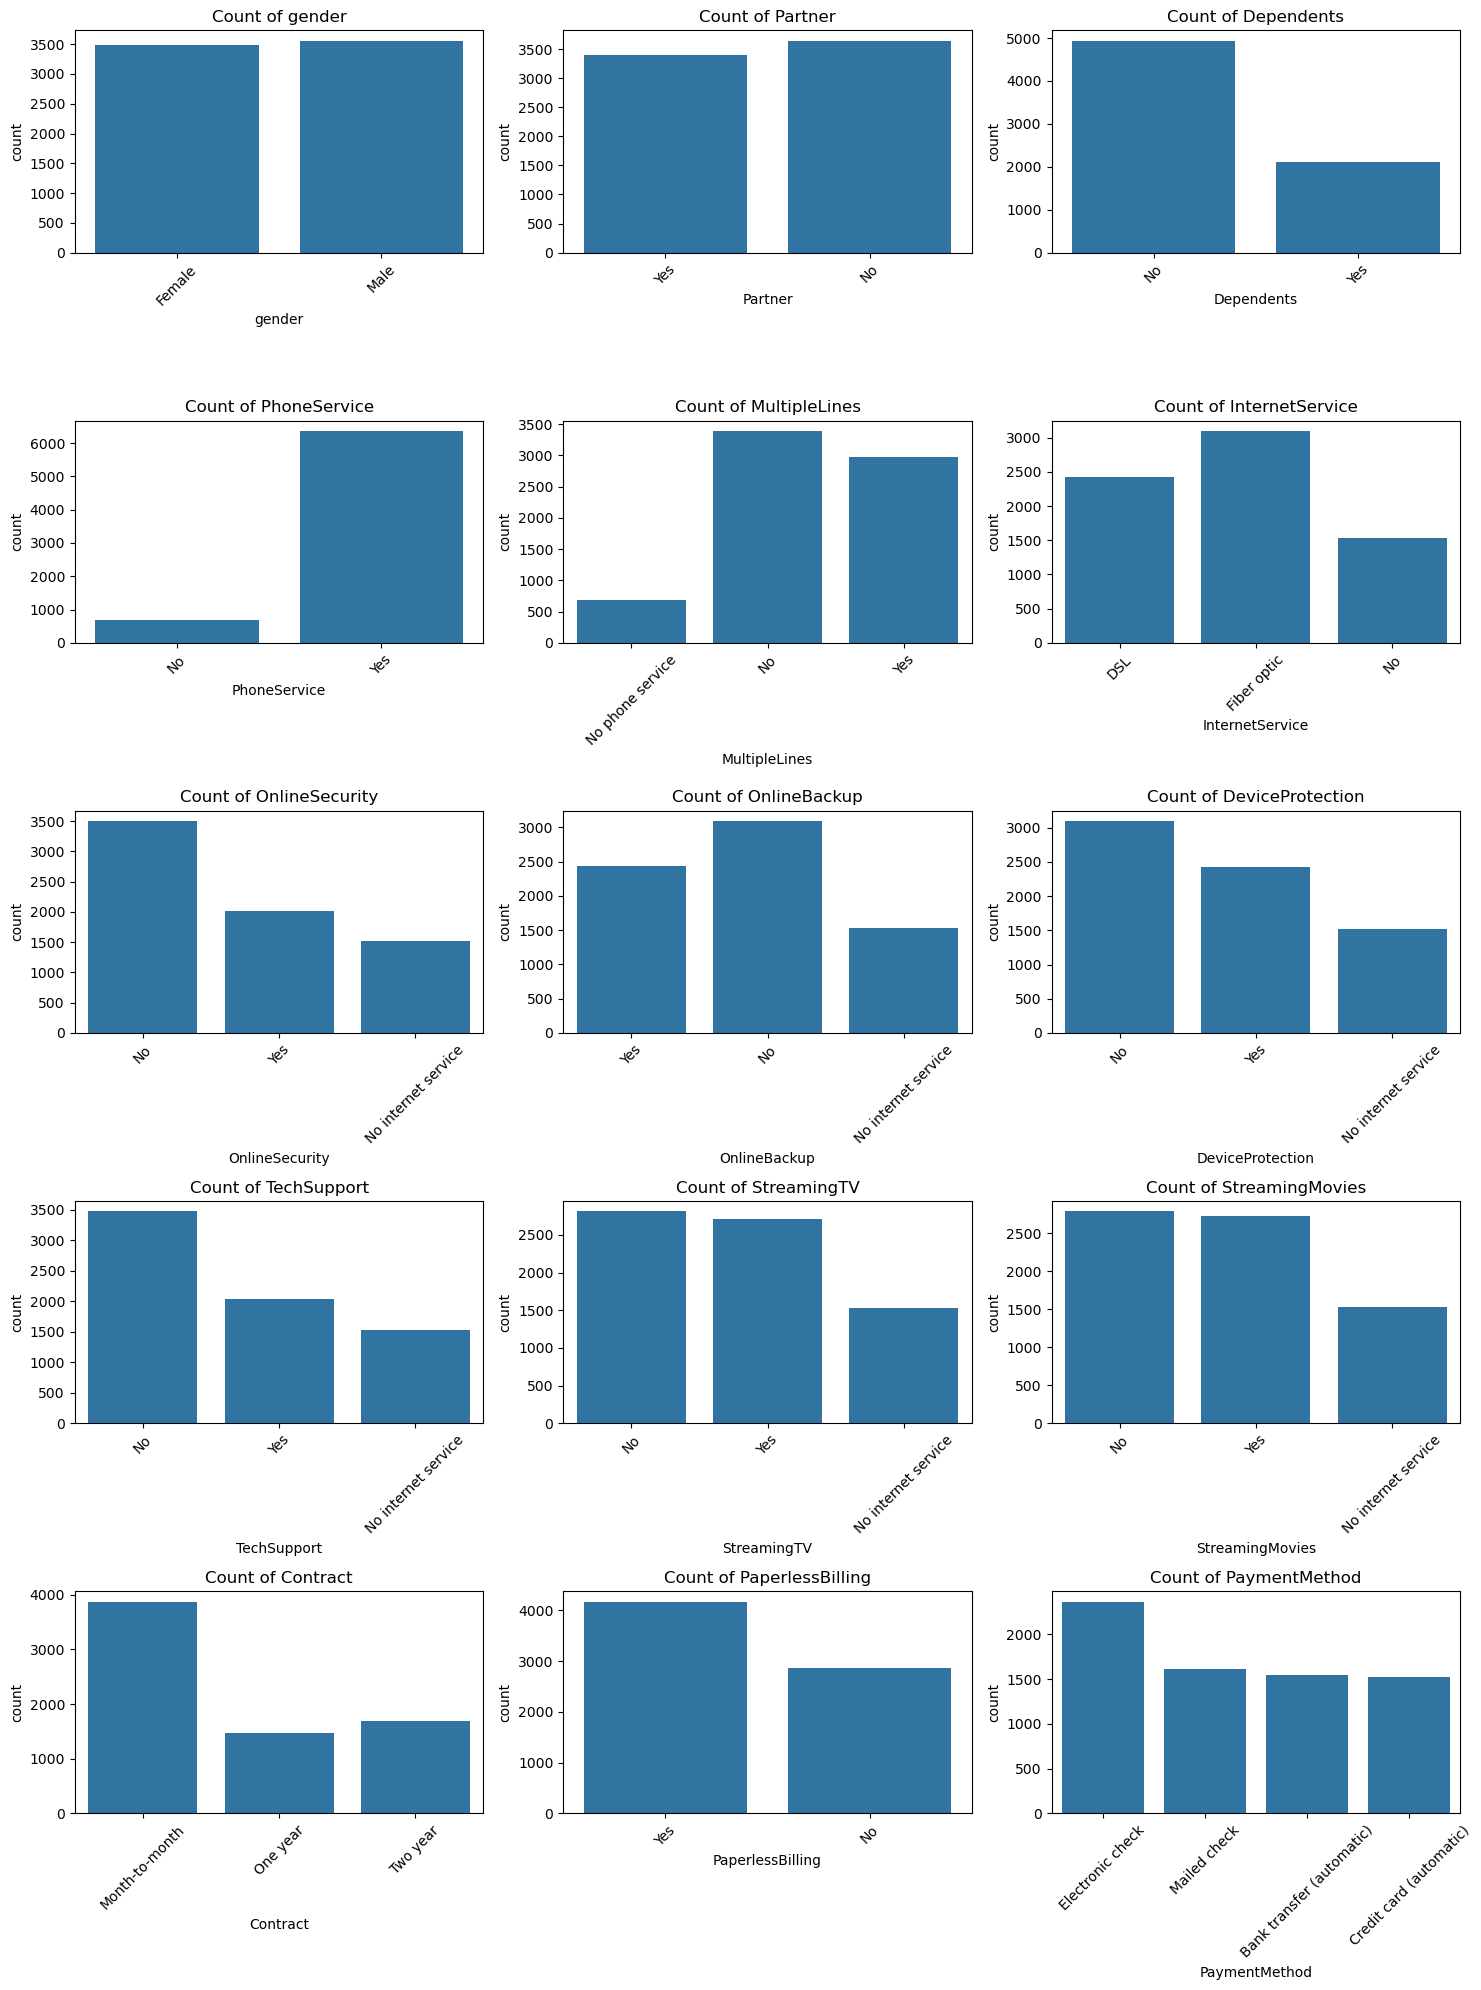

In [27]:
# Count plots for categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {feature}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


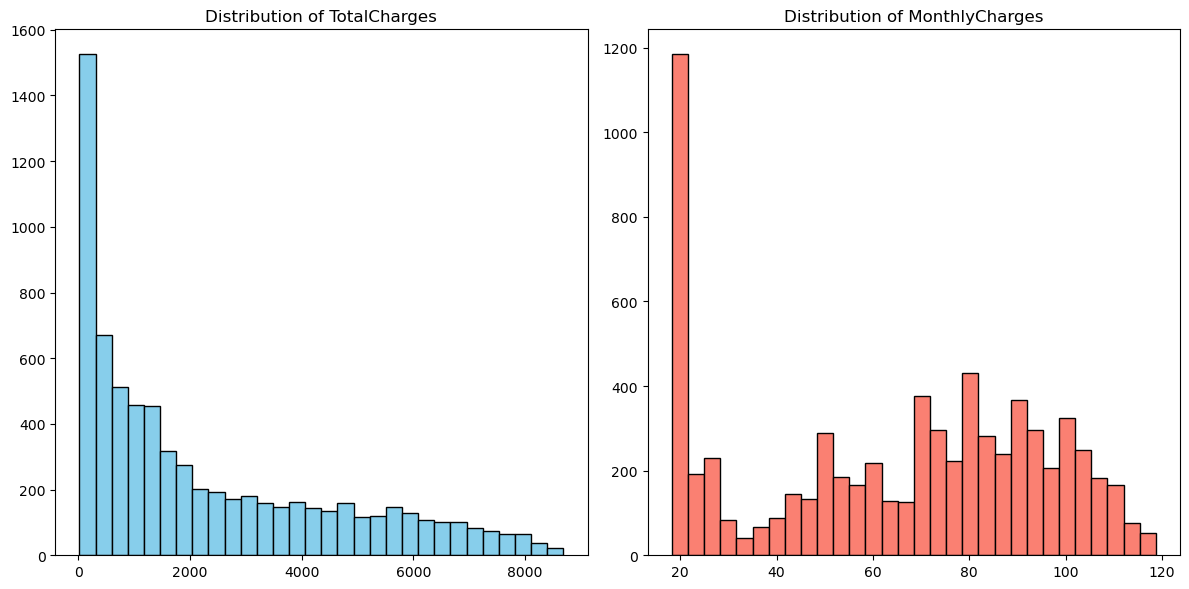

In [45]:
import matplotlib.pyplot as plt

# Plot histograms for TotalCharges and MonthlyCharges
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['TotalCharges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of TotalCharges')

plt.subplot(1, 2, 2)
plt.hist(df['MonthlyCharges'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of MonthlyCharges')

plt.tight_layout()
plt.show()


In [124]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [110]:
# Example of creating interaction features
df['ChargeRatio'] = df['TotalCharges'] / (df['MonthlyCharges'] + 1)  # Adding 1 to avoid division by zero

In [101]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
ChargeRatio         11
dtype: int64

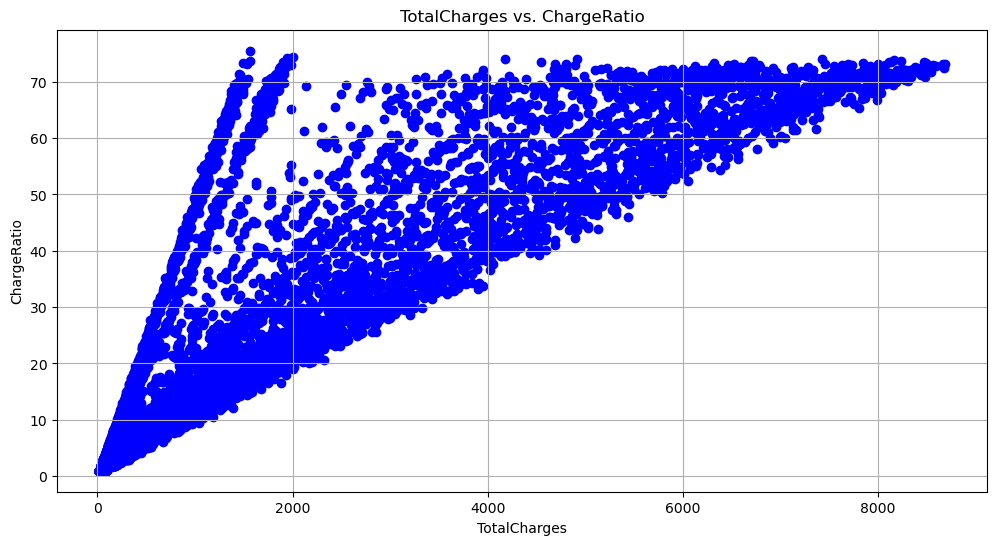

In [52]:
import matplotlib.pyplot as plt

# Plot TotalCharges vs. ChargeRatio
plt.figure(figsize=(12, 6))
plt.scatter(df['TotalCharges'], df['ChargeRatio'], color='blue')
plt.title('TotalCharges vs. ChargeRatio')
plt.xlabel('TotalCharges')
plt.ylabel('ChargeRatio')
plt.grid(True)
plt.show()


In [47]:
print(df[['TotalCharges', 'MonthlyCharges']].describe())

       TotalCharges  MonthlyCharges
count   7032.000000     7043.000000
mean    2283.300441       64.761692
std     2266.771362       30.090047
min       18.800000       18.250000
25%      401.450000       35.500000
50%     1397.475000       70.350000
75%     3794.737500       89.850000
max     8684.800000      118.750000


In [53]:
print(df['ChargeRatio'].describe())


count    7032.000000
mean       31.793095
std        24.148511
min         0.949495
25%         8.606988
50%        28.228590
75%        54.309968
max        75.518072
Name: ChargeRatio, dtype: float64


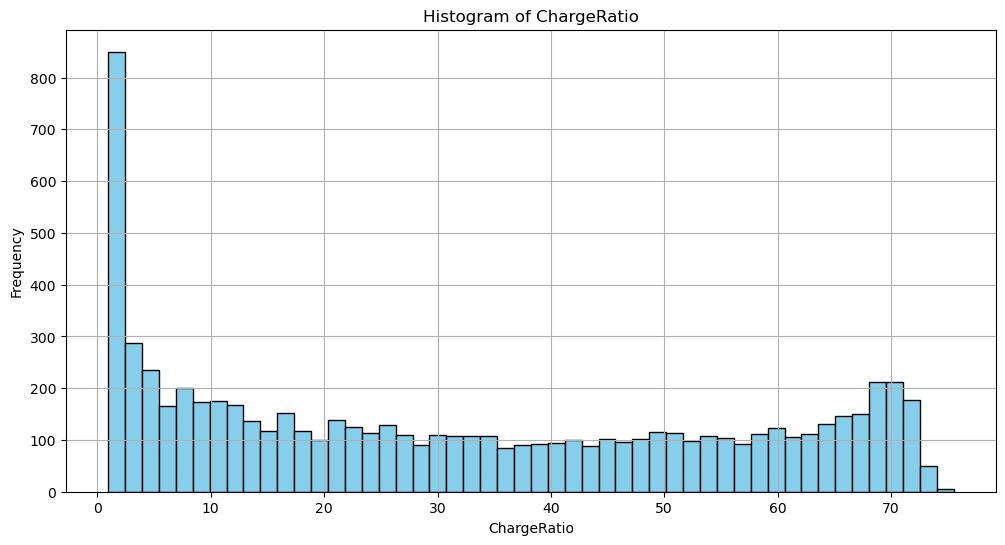

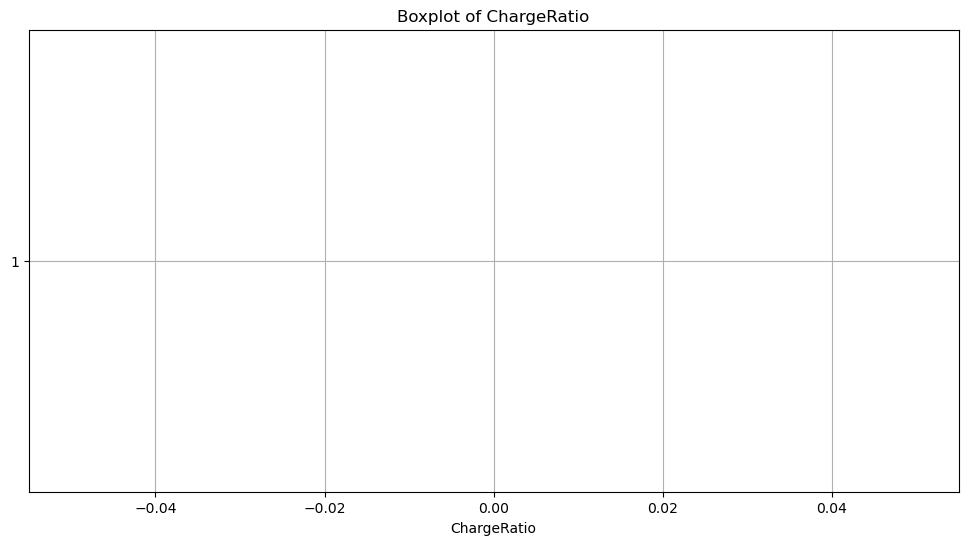

In [54]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['ChargeRatio'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of ChargeRatio')
plt.xlabel('ChargeRatio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df['ChargeRatio'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'))
plt.title('Boxplot of ChargeRatio')
plt.xlabel('ChargeRatio')
plt.grid(True)
plt.show()


In [55]:
Q1 = df['ChargeRatio'].quantile(0.25)
Q3 = df['ChargeRatio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ChargeRatio'] < lower_bound) | (df['ChargeRatio'] > upper_bound)]
print("Number of outliers:", len(outliers))
print(outliers)


Number of outliers: 0
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, ChargeRatio]
Index: []

[0 rows x 22 columns]


*3. Developing Hypotheses
Based on the statistics and visualizations, you can refine or test hypotheses:

### Hypothesis 1: Contract Types
    Hypothesis: Higher ChargeRatio might indicate longer-term contracts.
    Reasoning: Customers with higher ChargeRatio could be on longer contracts, which accumulate more total charges relative to     their monthly payments.
### Hypothesis 2: Customer Tenure
    Hypothesis: Longer-tenured customers may have higher ChargeRatio.
    Reasoning: Customers who have been with the company for a longer time might show a higher ChargeRatio due to accumulated       total charges.
### Hypothesis 3: Churn Risk
    Hypothesis: Customers with extreme ChargeRatio values (either very high or very low) might have different churn risks.
    Reasoning: Extremely high ChargeRatio could indicate high spending but potentially also high churn risk if those customers     are over-paying relative to their monthly usage.


###**4. Next Steps

### Analyze Relationships: 
    Look at how ChargeRatio correlates with other features like contract type, tenure, or churn.
    Feature Engineering: Consider combining ChargeRatio with other features to build more complex and informative features.
    Predictive Modeling: Use ChargeRatio in predictive models to see if it improves performance in predicting outcomes such as     churn or customer segmentation.

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ContractEncoded'] = le.fit_transform(df['Contract'])


In [68]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargeRatio,ContractEncoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,0.967585,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,NaN,32.605695,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,NaN,1.971741,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,42.511547,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NaN,2.115063,0


Correlation between ChargeRatio and Tenure: 0.9987066400479785
Contract
Month-to-month    17.738122
One year          41.281256
Two year          55.826594
Name: ChargeRatio, dtype: float64


### 1. Correlation Between ChargeRatio and Tenure
    Correlation Value: 0.9987

            Interpretation: A correlation of 0.9987 is extremely close to 1, which indicates a very strong positive relationship between ChargeRatio and Tenure. This means that as Tenure increases, ChargeRatio also increases almost linearly.
    Implications:

    Longer Tenure: Customers who have been with the company for a longer period tend to have a higher ChargeRatio. This suggests that these customers accumulate more total charges relative to their monthly charges over time.
### 2. Average ChargeRatio by Contract Type
Contract Types and Average ChargeRatio:

    Month-to-Month: 17.74
   One Year: 41.28
   Two Year: 55.83
# Interpretation:

### Month-to-Month Contracts: 
    Customers on month-to-month contracts have the lowest average ChargeRatio of 17.74. This might indicate that these customers have a more balanced ratio of total charges to monthly charges, possibly due to less commitment and potentially lower total charges accrued over time.
### One Year Contracts: 
    Customers on one-year contracts have a higher average ChargeRatio of 41.28. This suggests that these customers tend to accumulate a higher total amount of charges relative to their monthly payments compared to month-to-month customers.
### Two Year Contracts: 
    Customers on two-year contracts have the highest average ChargeRatio of 55.83. This indicates that these customers, who are committed for a longer term, accrue even more total charges relative to their monthly charges. This could be due to the longer duration allowing more time for total charges to accumulate.
Detailed Analysis and Implications
Customer Behavior Insights
### Contract Duration:

    Long-Term Contracts: Customers on longer-term contracts (one year or two years) have higher ChargeRatio values. This suggests that such contracts may lead to higher total spending relative to monthly spending, potentially due to customers receiving more services or having higher service levels over a longer period.
### Short-Term Contracts: 
    Month-to-month customers have a significantly lower ChargeRatio, possibly due to shorter commitment periods and potentially lower total spending.
### Tenure Influence:
    The strong correlation between ChargeRatio and Tenure reinforces the idea that as customers stay longer, their total charges relative to monthly charges increase. This trend is consistent with the observation that customers with longer tenure or longer contracts tend to have higher ChargeRatio values.
### Hypotheses and Actions
`Customer Segmentation:

    Segment customers based on their contract type and tenure to tailor marketing strategies. For instance, offer incentives for long-term contracts to attract customers with higher ChargeRatio potential.
## Churn Analysis:

    Investigate whether customers with higher ChargeRatio have a higher or lower churn rate. If high ChargeRatio correlates with lower churn, consider strategies to retain such high-value customers.
## Revenue Optimization:

    Use ChargeRatio as a feature to identify high-value customers who contribute significantly to total charges. Develop targeted promotions or loyalty programs to enhance customer retention and revenue.
    Visualization for Better Understanding


### 1. Correlation Between ChargeRatio and Tenure
    Correlation Value: 0.9987

            Interpretation: A correlation of 0.9987 is extremely close to 1, which indicates a very strong positive relationship between ChargeRatio and Tenure. This means that as Tenure increases, ChargeRatio also increases almost linearly.
    Implications:

    Longer Tenure: Customers who have been with the company for a longer period tend to have a higher ChargeRatio. This suggests that these customers accumulate more total charges relative to their monthly charges over time.

In [87]:
correlation = df[['ChargeRatio', 'tenure']].corr().iloc[0, 1]
print(f"Correlation between ChargeRatio and Tenure: {correlation}")

# Compare ChargeRatio across different contract types
print(df.groupby('Contract')['ChargeRatio'].mean())


Correlation between ChargeRatio and Tenure: 0.9987066400479785
Contract
Month-to-month    17.738122
One year          41.281256
Two year          55.826594
Name: ChargeRatio, dtype: float64


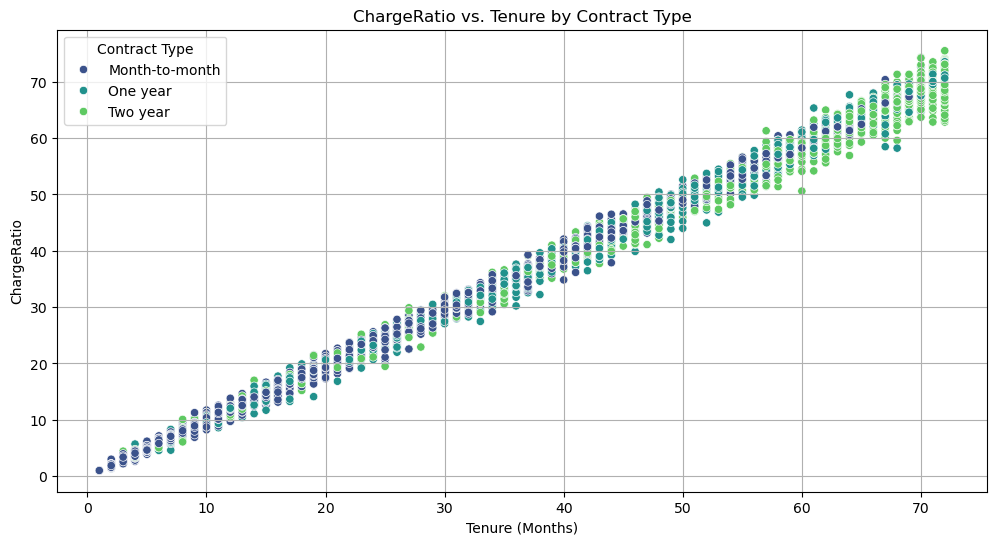

/var/folders/gk/537qy50d4ls5vppc09_8xb0r0000gn/T/ipykernel_6944/2603754341.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Contract', y='ChargeRatio', palette='viridis')


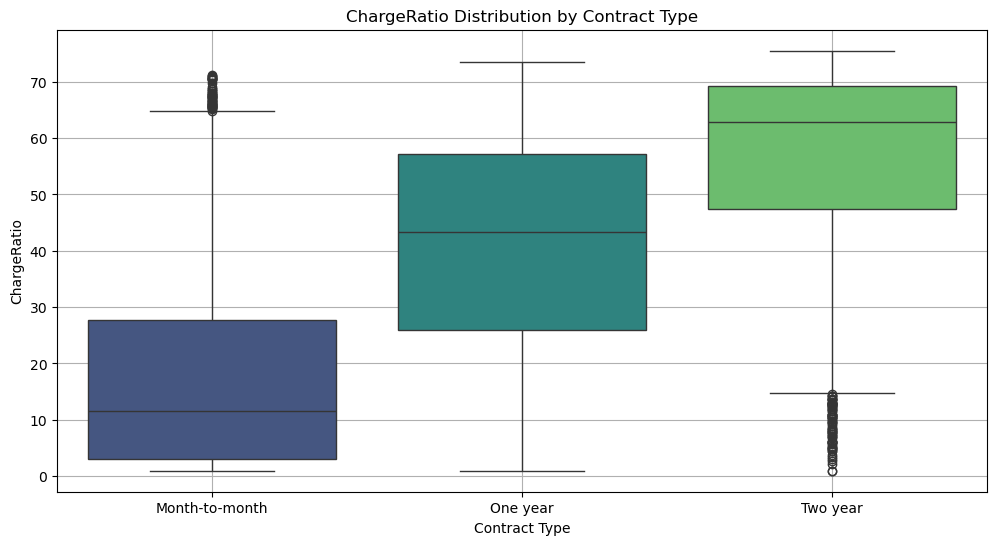

In [63]:
import seaborn as sns

# Scatter plot of ChargeRatio vs. Tenure
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='tenure', y='ChargeRatio', hue='Contract', palette='viridis')
plt.title('ChargeRatio vs. Tenure by Contract Type')
plt.xlabel('Tenure (Months)')
plt.ylabel('ChargeRatio')
plt.legend(title='Contract Type')
plt.grid(True)
plt.show()

# Boxplot for ChargeRatio by Contract Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Contract', y='ChargeRatio', palette='viridis')
plt.title('ChargeRatio Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('ChargeRatio')
plt.grid(True)
plt.show()


In [86]:
# Compare ChargeRatio across contract types
print(df.groupby('Contract')['ChargeRatio'].mean())


Contract
Month-to-month    17.738122
One year          41.281256
Two year          55.826594
Name: ChargeRatio, dtype: float64


### 2. Calculate Churn Rates by ChargeRatio Ranges
    You can segment customers into different ranges of ChargeRatio and then calculate the churn rate for each range. This will help you understand how churn rates vary with different levels of ChargeRatio.

    Step-by-Step Analysis
    Define ChargeRatio Ranges

    Segment the ChargeRatio into bins or ranges. This could be done using quantiles, fixed ranges, or based on the distribution of ChargeRatio.




In [80]:
# Define ranges or bins for ChargeRatio
bins = [0, 20, 40, 60, 80]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
df['ChargeRatioCategory'] = pd.cut(df['ChargeRatio'], bins=bins, labels=labels)


In [81]:
print(df['ChargeRatioCategory'].value_counts())


ChargeRatioCategory
Low            2856
Medium-Low     1440
Medium-High    1388
High           1348
Name: count, dtype: int64


In [82]:
bins = [df['ChargeRatio'].quantile(0), 
        df['ChargeRatio'].quantile(0.25), 
        df['ChargeRatio'].quantile(0.50), 
        df['ChargeRatio'].quantile(0.75), 
        df['ChargeRatio'].quantile(1)]
labels = ['Q1', 'Q2', 'Q3', 'Q4']
df['ChargeRatioCategoryQ'] = pd.cut(df['ChargeRatio'], bins=bins, labels=labels)


In [83]:
print(df['ChargeRatioCategory'].value_counts())

ChargeRatioCategory
Low            2856
Medium-Low     1440
Medium-High    1388
High           1348
Name: count, dtype: int64


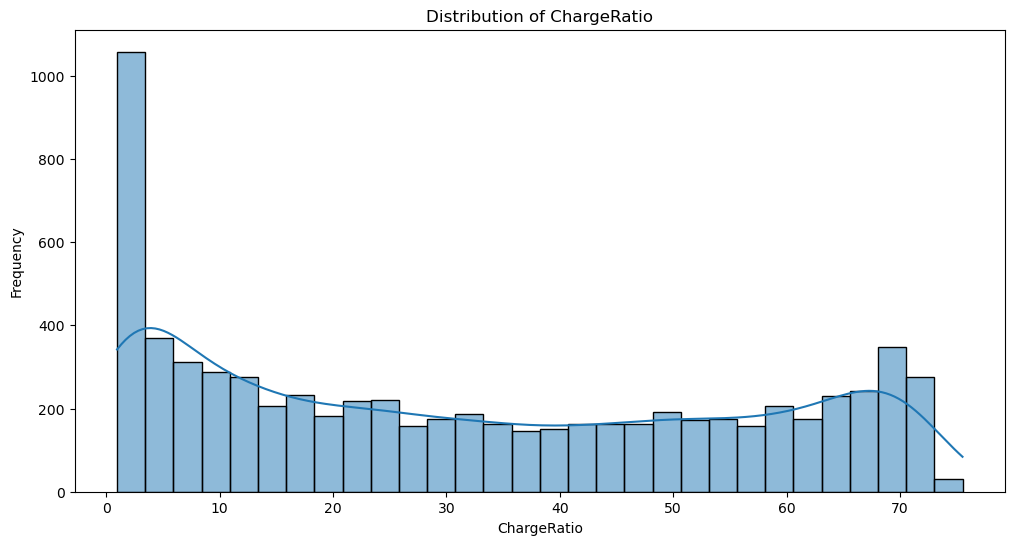

In [79]:
plt.figure(figsize=(12, 6))
sns.histplot(df['ChargeRatio'], bins=30, kde=True)
plt.title('Distribution of ChargeRatio')
plt.xlabel('ChargeRatio')
plt.ylabel('Frequency')
plt.show()


### Hypotheses and Actions
`Customer Segmentation:

    Segment customers based on their contract type and tenure to tailor marketing strategies. For instance, offer incentives for long-term contracts to attract customers with higher ChargeRatio potential.

In [89]:
X = df[['ChargeRatio']]

In [95]:
df.isnull().sum()

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
PhoneService               0
MultipleLines              0
InternetService            0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges              11
Churn                   7043
ChargeRatio               11
ContractEncoded            0
ChargeRatioCategory       11
ChargeRatioCategoryQ      12
dtype: int64

In [91]:
from sklearn.cluster import KMeans

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_



ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Performance:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
